In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [6]:
regions = pd.read_csv('data_ml/regions.csv', index_col=0).reset_index()
regions['index'] = pd.to_datetime(regions['index'])
regions

,index,Africa,Americas,Asia,Europe,Oceania
0,2020-01-22,0.0,1.0,556.0,0.0,0.0
1,2020-01-23,0.0,3.0,654.0,0.0,0.0
2,2020-01-24,0.0,5.0,937.0,2.0,0.0
3,2020-01-25,0.0,5.0,1429.0,3.0,0.0
4,2020-01-26,0.0,8.0,2105.0,3.0,4.0
...,...,...,...,...,...,...
1138,2023-03-05,13055369.0,191044835.0,211313286.0,246585327.0,13999990.0
1139,2023-03-06,13056372.0,191053527.0,211331424.0,246615532.0,13999992.0
1140,2023-03-07,13056975.0,191097450.0,211359172.0,246673695.0,13999992.0
1141,2023-03-08,13058586.0,191179187.0,211394742.0,246734062.0,14000153.0


In [3]:
data = pd.read_csv('data/processed/covid19.csv', index_col=0).reset_index()
data['index'] = pd.to_datetime(data['index'])
data

,index,Africa,Americas,Asia,Boat,Europe,Oceania
0,2020-01-22,0,1,556,0,0,0
1,2020-01-23,0,1,654,0,0,0
2,2020-01-24,0,2,937,0,2,0
3,2020-01-25,0,2,1428,0,3,0
4,2020-01-26,0,6,2105,0,3,4
...,...,...,...,...,...,...,...
440,2021-04-06,4546210,57377866,29596544,721,40858385,39413
441,2021-04-07,4560556,57619595,29862902,721,41020040,39671
442,2021-04-08,4580269,57879044,30141115,721,41302299,39887
443,2021-04-09,4595188,58145887,30432506,721,41477174,39904


In [7]:
class MyModel(Prophet):
    def __init__(self,model, df, ds:str, y:str, train_size:float=0.6):
        self.data = df[[ds,y]].copy()
        self.data.rename(columns={ds:'ds', y:'y'}, inplace=True)
        self.ratio = int(len(self.data)*train_size)
        self.train = self.data.iloc[:self.ratio,:]
        self.test = self.data.iloc[self.ratio:,:]
        self.model = model
    def fit(self):
        self.model.fit(self.train)

    def predict(self) :
        self.train_pred = self.model.predict(self.train)
        self.test_pred = self.model.predict(self.train)
        self.forecast = self.model.predict(self.data)
    def fit_predict(self):
        self.fit()
        self.predict()
          
    def plot(self):
        plt.figure(figsize=(15,8))
        plt.plot(self.data.set_index('ds'), label='True Values')
        plt.plot(self.forecast.set_index('ds')['yhat'], label='Predicted Values')
        plt.axvline(x=self.data.set_index('ds').index[self.ratio], color='red' )
        plt.legend()
        plt.show()
        

14:27:54 - cmdstanpy - INFO - Chain [1] start processing
14:27:54 - cmdstanpy - INFO - Chain [1] done processing


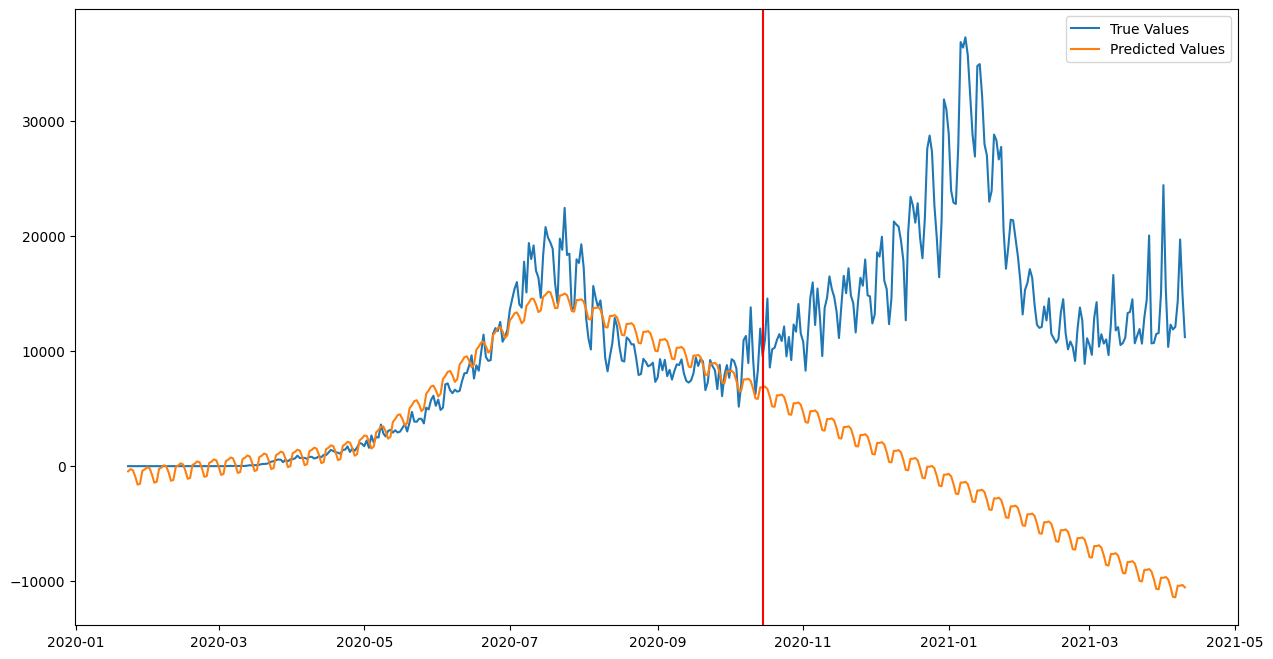

14:27:54 - cmdstanpy - INFO - Chain [1] start processing
14:27:54 - cmdstanpy - INFO - Chain [1] done processing


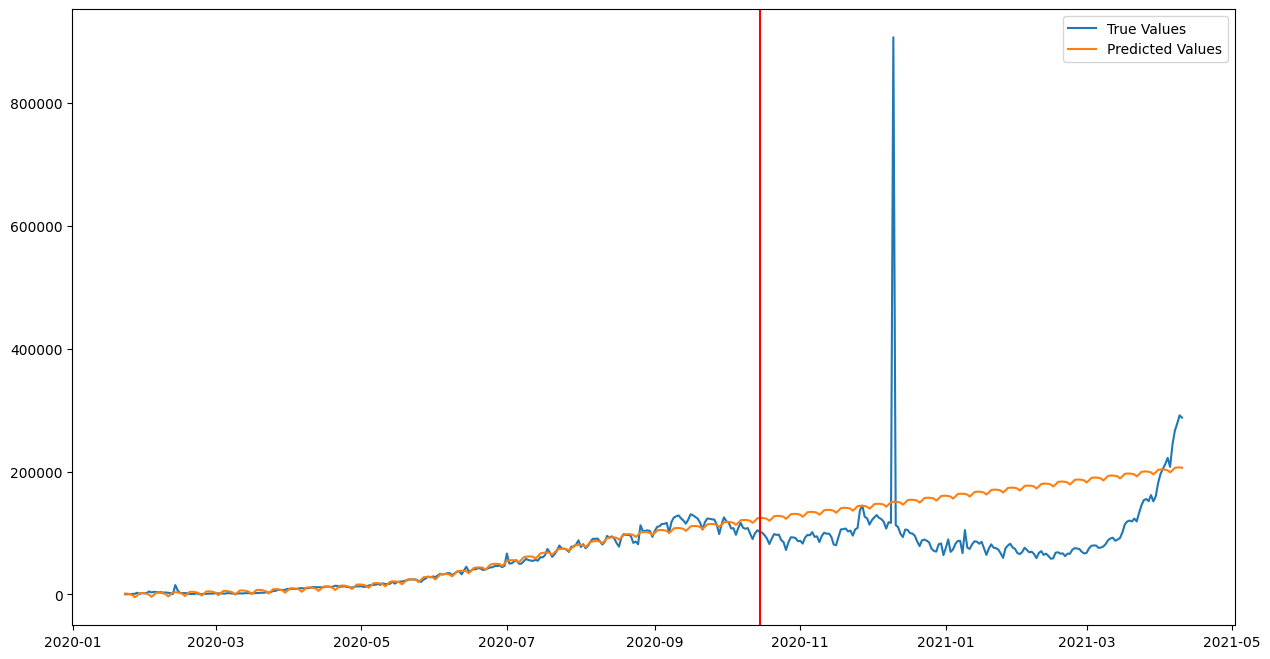

14:27:55 - cmdstanpy - INFO - Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing


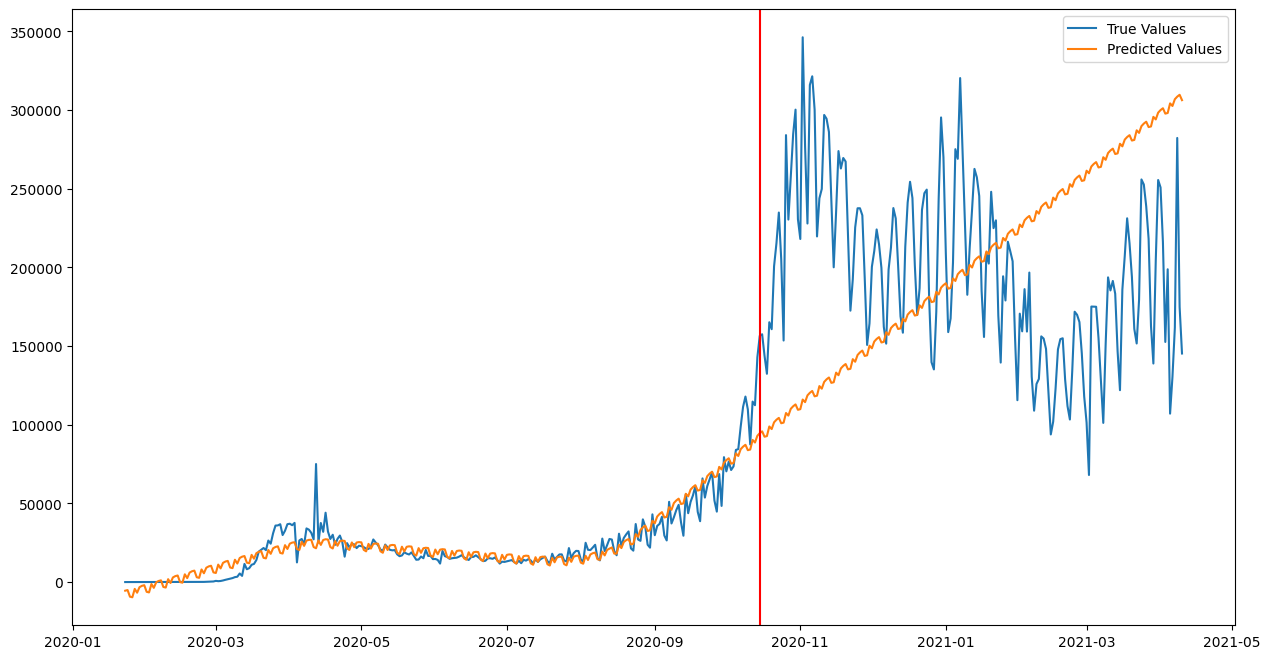

14:27:55 - cmdstanpy - INFO - Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing


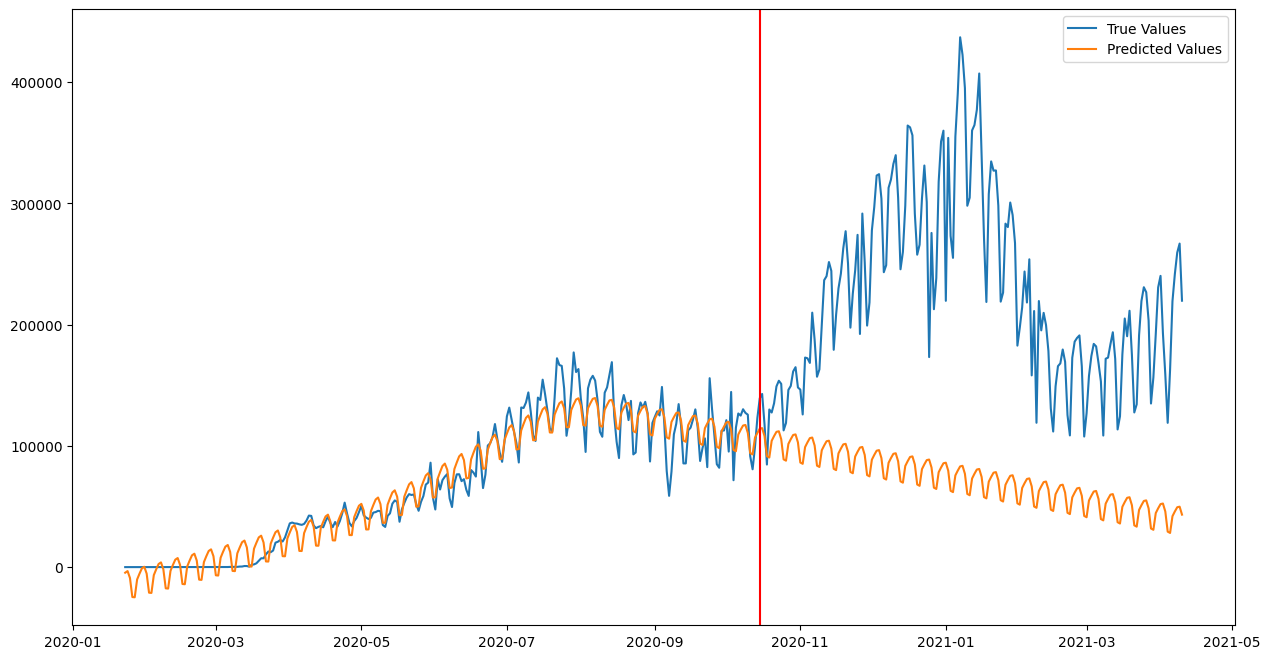

14:27:55 - cmdstanpy - INFO - Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing


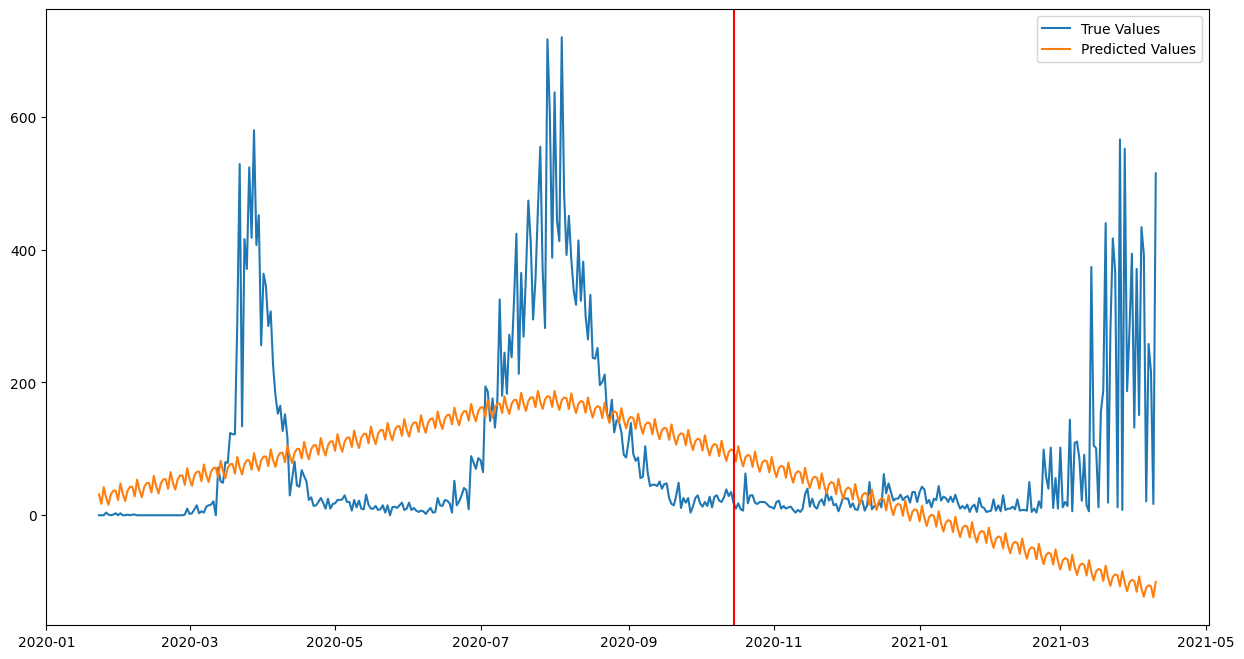

14:27:56 - cmdstanpy - INFO - Chain [1] start processing
14:27:56 - cmdstanpy - INFO - Chain [1] done processing


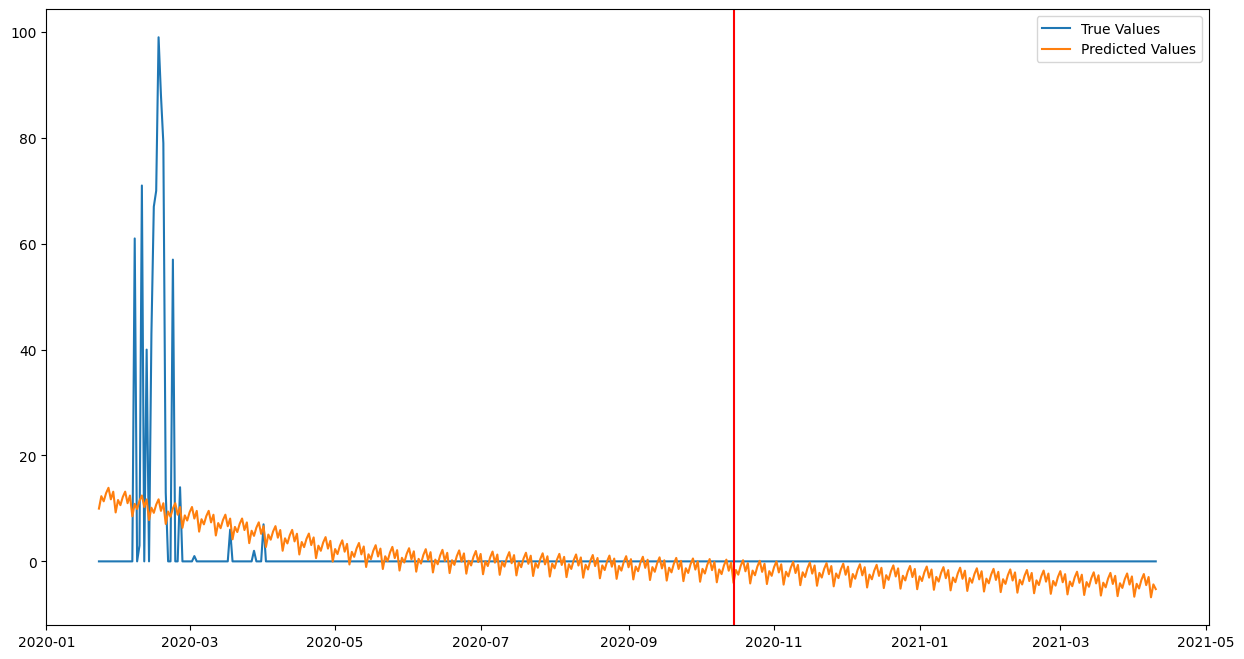

In [8]:
for continent in ['Africa', 'Asia','Europe','Americas','Oceania','Boat'] :
    model = MyModel(Prophet(), data, 'index', continent)
    model.fit_predict()
    model.plot()

In [299]:
Asia = MyModel(Prophet(), data, 'index', 'Asia')

In [300]:
Asia.fit_predict()

11:53:39 - cmdstanpy - INFO - Chain [1] start processing
11:53:39 - cmdstanpy - INFO - Chain [1] done processing


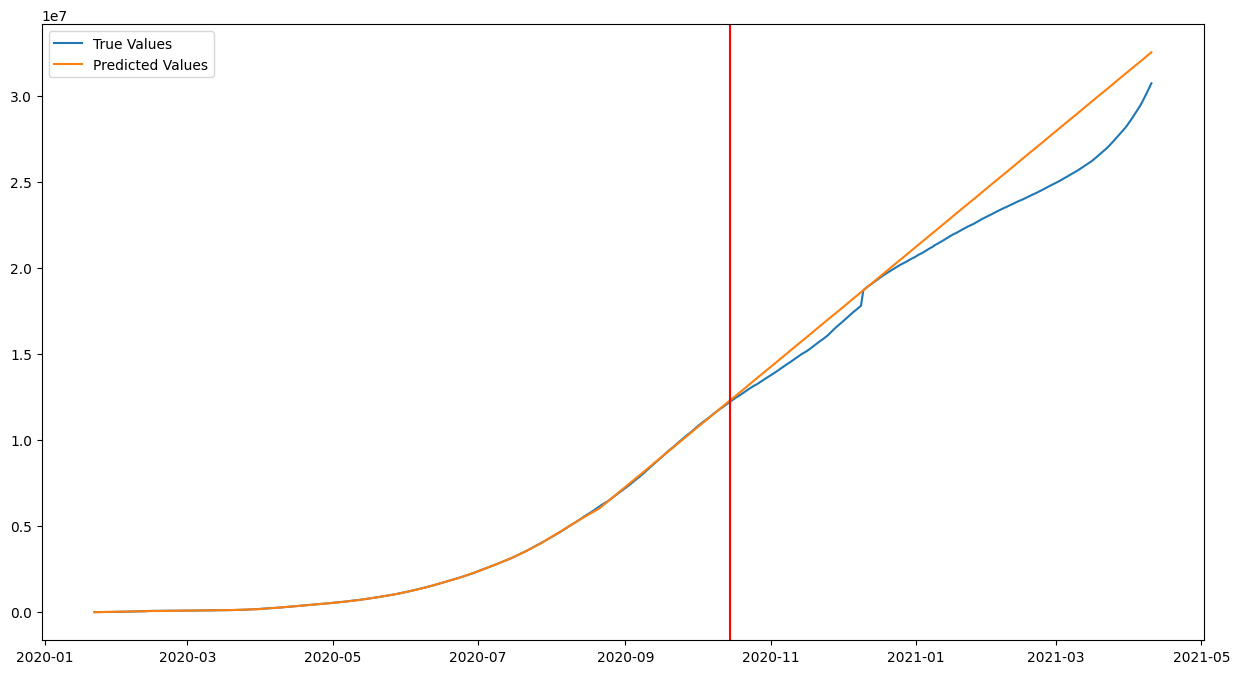

In [301]:
Asia.plot()